<a href="https://colab.research.google.com/github/pulpor/ebac/blob/main/Exerc%C3%ADcio_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ambiente

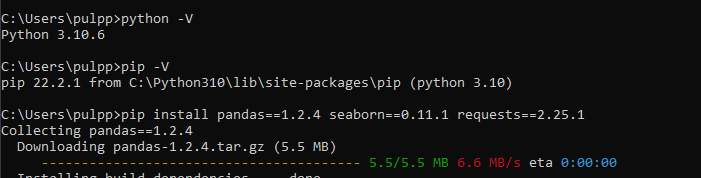


# script de extração

In [ ]:
import os
import time
import json
from random import random
from datetime import datetime

import requests

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

# Criando a variável data e hora 

for _ in range(0, 10):

  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')

  # Captando a taxa CDI do site da B3

  try:
    response = requests.get(URL)
    response.raise_for_status()
  except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
  except Exception as exc:
    print("Erro, parando a execução.")
    raise exc
  else:
    dado = json.loads(response.text)
    cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)

  # Verificando se o arquivo "taxa-cdi.csv" existe

  if os.path.exists('./taxa-cdi.csv') == False:

    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')

  # Salvando dados no arquivo "taxa-cdi.csv"

  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')

  time.sleep(2 + (random() - 0.5))

print("Sucesso")

Sucesso


# script de visualização

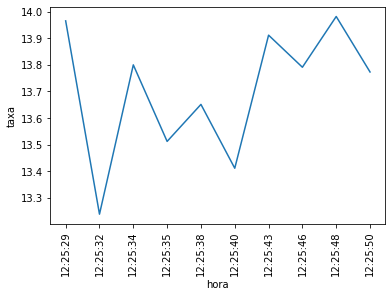

In [ ]:
import csv
from sys import argv
import pandas as pd
import seaborn as sns

# Extraindo as colunas hora e taxa

df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico

grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")

# combinando os scripts de extração e visualização

Sucesso


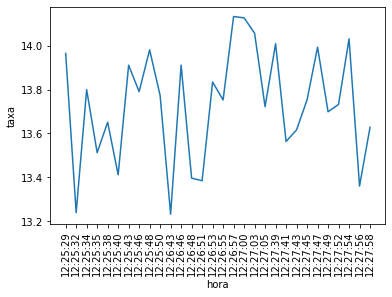

In [ ]:
# combinação dos scripts de extração e visualização
import os
import time
import json

from random import random
from datetime import datetime

import csv
from sys import argv

import requests
import pandas as pd
import seaborn as sns

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'


# Criando a variável data e hora 

for _ in range(0, 10):
  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')


  # Captando a taxa CDI do site da B3

  try:
    response = requests.get(URL)
    response.raise_for_status()
  except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
  except Exception as exc:
    print("Erro, parando a execução.")
    raise exc
  else:
    dado = json.loads(response.text)
    cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)


  # Verificando se o arquivo "taxa-cdi.csv" existe

  if os.path.exists('./taxa-cdi.csv') == False:
    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')


  # Salvando dados no arquivo "taxa-cdi.csv"

  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')
  time.sleep(2 + (random() - 0.5))

print("Sucesso")

# Extraindo as colunas hora e taxa

df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico
grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")